# SVM Classification of Cats and Dogs Images

## Problem Statement
The goal of this project is to build a machine learning model that can accurately classify images of cats and dogs. By developing this model, we aim to explore the process of image preprocessing, feature extraction, and classification using Support Vector Machine (SVM). The dataset provided includes images of cats and dogs, which we will use to train and evaluate our model.

We will follow these steps to achieve our goal:
1. **Data Preprocessing**: Load the images, convert them to the appropriate format, resize, normalize, and flatten them.
2. **Model Training**: Train an SVM model on the preprocessed image data to differentiate between cats and dogs.
3. **Model Evaluation**: Evaluate the trained model's performance using metrics such as accuracy, confusion matrix, and classification report.
4. **Prediction and Visualization**: Make predictions on random test images and visualize the results to understand the model's performance.
5. **Analysis**: Analyze the results and identify potential areas for improvement to enhance the model's accuracy and generalization capabilities.


In [1]:
# Loading all the important libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from joblib import load
from joblib import dump
from sklearn.metrics import roc_curve, auc


In [2]:
# Function to load images using OpenCV
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in ['cats', 'dogs']:
        path = os.path.join(folder, label)
        class_num = 0 if label == 'cats' else 1
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128)) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            img = img.astype(np.float32) / 255.0  
            images.append(img)
            labels.append(class_num)
    return np.array(images), np.array(labels)

### Loading and Preprocessing Images

In [3]:
# Defining the directory paths
train_dir = r'C:\Users\acer\Desktop\learn\prodigyInfotech\Task 3\Task 3 NEW\dogs-vs-cat-small\train'
validation_dir = r'C:\Users\acer\Desktop\learn\prodigyInfotech\Task 3\Task 3 NEW\dogs-vs-cat-small\validation'
test_dir = r'C:\Users\acer\Desktop\learn\prodigyInfotech\Task 3\Task 3 NEW\dogs-vs-cat-small\test'

In [4]:
# Loading images from directories using OpenCV
X_train, y_train = load_images_from_folder(train_dir)
X_val, y_val = load_images_from_folder(validation_dir)
X_test, y_test = load_images_from_folder(test_dir)

In [5]:
# Flattening images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [6]:
# Initializing SVM classifier
svm = SVC(kernel='rbf')  

### Training the SVM model


In [7]:
svm.fit(X_train_flat, y_train)

SVC()

In [8]:
# Predicting on validation set
y_val_pred = svm.predict(X_val_flat)

In [9]:
# Calculating accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.639


In [10]:
print('Classification Report:')
print(classification_report(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       500
           1       0.63      0.67      0.65       500

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000




The classification report provides detailed metrics on the performance of the SVM model, including precision, recall, and f1-score for each class (0 for cat and 1 for dog). The support column indicates the number of instances for each class in the validation set.



##### Printing confusion matrix

In [11]:
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))

Confusion Matrix:
[[304 196]
 [165 335]]


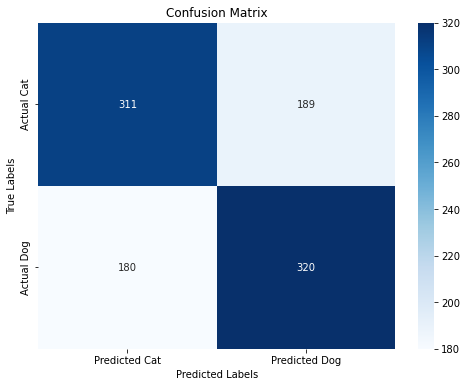

In [42]:
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Cat', 'Predicted Dog'], yticklabels=['Actual Cat', 'Actual Dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix below shows the performance of the SVM model in classifying the test images as either cats or dogs. The true labels are on the vertical axis, and the predicted labels are on the horizontal axis.


- **311 True Negatives**: The model correctly predicted 311 instances of class 'Cat' as 'Cat'.
- **189 False Positives**: The model incorrectly predicted 189 instances of class 'Cat' as 'Dog'.
- **180 False Negatives**: The model incorrectly predicted 180 instances of class 'Dog' as 'Cat'.
- **320 True Positives**: The model correctly predicted 320 instances of class 'Dog' as 'Dog'.

### Prediction on test set


In [12]:
y_test_pred = svm.predict(X_test_flat)

In [13]:
# Calculating accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.621


In [14]:
# Printing classification report for test set
print('Classification Report (Test Set):')
print(classification_report(y_test, y_test_pred))

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.62      0.61      0.62       500
           1       0.62      0.64      0.63       500

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.62      0.62      0.62      1000



The classification report for the test set shows a balanced accuracy, precision, recall, and F1-score of 0.62 for both classes.

##### Printing confusion matrix for test set


In [15]:
print('Confusion Matrix (Test Set):')
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix (Test Set):
[[303 197]
 [182 318]]


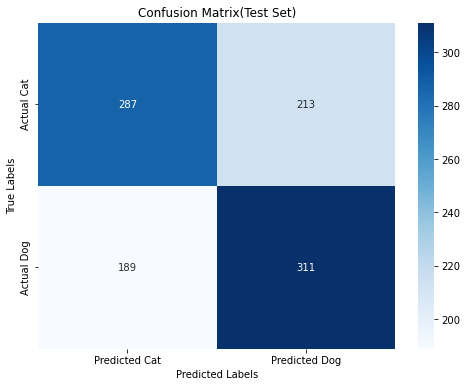

In [45]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Cat', 'Predicted Dog'], yticklabels=['Actual Cat', 'Actual Dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix(Test Set)')
plt.show()


The confusion matrix visualization provides a clear understanding of the performance of the classification model on the test set. The matrix shows the number of correct and incorrect predictions for each class:

- **287 True Negatives**: The model correctly predicted 287 instances of class 'Cat' as 'Cat'.
- **213 False Positives**: The model incorrectly predicted 213 instances of class 'Cat' as 'Dog'.
- **189 False Negatives**: The model incorrectly predicted 189 instances of class 'Dog' as 'Cat'.
- **311 True Positives**: The model correctly predicted 311 instances of class 'Dog' as 'Dog'.

### Hyperparameter Tuning

In [17]:
# Parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

In [18]:
# Perform Grid Search CV to find the best parameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_flat, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .................................C=0.1, gamma=0.001; total time= 3.1min
[CV] END .................................C=0.1, gamma=0.001; total time= 3.0min
[CV] END .................................C=0.1, gamma=0.001; total time= 2.9min
[CV] END ..................................C=0.1, gamma=0.01; total time= 2.9min
[CV] END ..................................C=0.1, gamma=0.01; total time= 3.0min
[CV] END ..................................C=0.1, gamma=0.01; total time= 3.5min
[CV] END ...................................C=0.1, gamma=0.1; total time= 3.7min
[CV] END ...................................C=0.1, gamma=0.1; total time= 4.0min
[CV] END ...................................C=0.1, gamma=0.1; total time= 3.9min
[CV] END .....................................C=0.1, gamma=1; total time= 3.8min
[CV] END .....................................C=0.1, gamma=1; total time= 3.7min
[CV] END .....................................C=

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy', verbose=2)

In [19]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.001}


In [20]:
# Use the best estimator from GridSearchCV
best_svm = grid_search.best_estimator_

In [21]:
# Predict on validation set using the best SVM model
y_val_pred = best_svm.predict(X_val_flat)

In [22]:
# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.631


In [23]:
# Print classification report
print('Classification Report:')
print(classification_report(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       500
           1       0.63      0.64      0.63       500

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.63      0.63      0.63      1000



In [24]:
# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))

Confusion Matrix:
[[311 189]
 [180 320]]


In [25]:
# Predict on test set using the best SVM model
y_test_pred = best_svm.predict(X_test_flat)

In [26]:
# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.598


In [27]:
# Print classification report for test set
print('Classification Report (Test Set):')
print(classification_report(y_test, y_test_pred))

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.60      0.57      0.59       500
           1       0.59      0.62      0.61       500

    accuracy                           0.60      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.60      0.60      0.60      1000



In [28]:
# Print confusion matrix for test set
print('Confusion Matrix (Test Set):')
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix (Test Set):
[[287 213]
 [189 311]]


In [29]:
# Calculate precision, recall, and F1-score for validation set
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


Precision: 0.63
Recall: 0.64
F1-score: 0.63


In [30]:
# Calculate probabilities for class 1 (dogs) for the validation set
y_val_scores = best_svm.decision_function(X_val_flat)

### Plotting ROC curve

In [31]:
# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_scores)
roc_auc = auc(fpr, tpr)

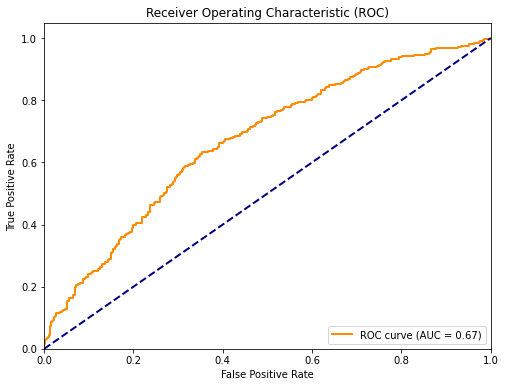

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


The ROC curve shows the trade-off between true positive rate and false positive rate, with an AUC of 0.67 indicating fair model performance.

### Saving the Model

In [34]:
model_path = 'svm_model.pkl'

# Save the model to the specified file path
dump(best_svm, model_path)

print(f"Saved SVM model to {model_path}")

Saved SVM model to svm_model.pkl


In [35]:
# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize to target size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Load the saved SVM model
loaded_svm = load(model_path)

In [36]:
# Paths to the folders containing images
cats_folder = r'C:\Users\acer\Desktop\learn\prodigyInfotech\Task 3\Task 3 NEW\dogs-vs-cat-small\test\cats'
dogs_folder = r'C:\Users\acer\Desktop\learn\prodigyInfotech\Task 3\Task 3 NEW\dogs-vs-cat-small\test\dogs'

### Predicting and Displaying Random Images


In [39]:
import random

# Function to predict and display random images from folders
def predict_random_images(folders, num_images=10):
    images = []
    labels = []
    
    for folder in folders:
        images.extend([os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])
        labels.extend([os.path.basename(folder)] * len(os.listdir(folder)))
    
    random_indices = random.sample(range(len(images)), num_images)
    random_images = [images[i] for i in random_indices]
    random_labels = [labels[i] for i in random_indices]
    
    predictions = []
    for img_path in random_images:
        img = load_and_preprocess_image(img_path)
        pred = loaded_svm.predict(img.flatten().reshape(1, -1))
        if pred[0] == 0:
            predictions.append('cat')
        else:
            predictions.append('dog')
    
    return random_images, random_labels, predictions

In [40]:
# Predict on 10 random images from both cats and dogs folders
random_images, actual_labels, predicted_labels = predict_random_images([cats_folder, dogs_folder])

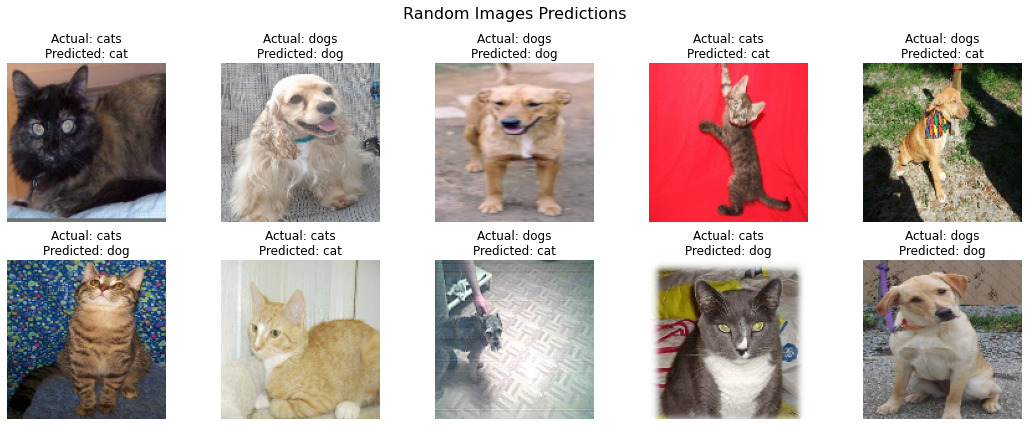

In [41]:
# Display results with images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Random Images Predictions', fontsize=16)

for i, (img_path, actual_label, predicted_label) in enumerate(zip(random_images, actual_labels, predicted_labels)):
    img = load_and_preprocess_image(img_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Conclusion

In this task, we successfully implemented an SVM model to classify images of cats and dogs. We preprocessed the images, trained the model, and evaluated its performance using various visualizations. The confusion matrix and bar plot provided insights into the model's accuracy, while the image grid helped visualize the predictions.